### Create Fundus Retina dataset

In this notebook a dataset is created and visualized

In [1]:
import os
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import datasets as d

First the raw data should be downloaded and put in a convient folder.

The data can be downloaded from here: [Data link](https://drive.google.com/file/d/178nqFih4HpvjPt4olFQaeLWGIGjfUHIo/view?usp=sharing). This links to google drive.

In [2]:
# Set seed
seed = 50
np.random.seed(seed)

In [3]:
# Define parameters for dataset
IMG_SIZE = 128                    # (IMG_SIZE,IMG_SIZE,3) is the shape of images
N_train = 2000                    # Number of images in training set
split = [0.7, 0.15, 0.15]         # train/val/test split
orientation_threshold = 0.45      # Threshold for orientation domination should be in interval [0,1]

# Path to where the raw data is saved
raw_data_path = "../datasets/data/Fundus_Retina/Data_Raw/"

# Path to where the new data should be
DATASET_PATH = "../datasets/data/Fundus_Retina/dataset_2000samples/"

Then the dataset can be created

In [4]:
# Create dataset
d.create_retina_dataset(IMG_SIZE, N_train, split,orientation_threshold, raw_data_path, DATASET_PATH)

testset: 100%|███████████████████████████████| 428/428 [01:24<00:00,  5.05it/s]


### Data visualization

The data can then be visualized by using the PyTorch DataLoader

In [5]:
# Set parameters for datasets
batch_size = 64
transform_train = [True,False] # First element is scaling/brightness second is rotation
transform_test = [False,False] # First element is scaling/brightness second is rotation

# Path to the dataset
data_path = "../datasets/data/Fundus_Retina/dataset_2000samples/"

trainset = d.FUNDUS_RETINA(dataset = "train", transform = transform_train, data_path=data_path)
valset = d.FUNDUS_RETINA(dataset = "val", transform = transform_test, data_path=data_path)
testset = d.FUNDUS_RETINA(dataset = "test", transform = transform_test, data_path=data_path)

In [6]:
# Get dataloaders
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Show images

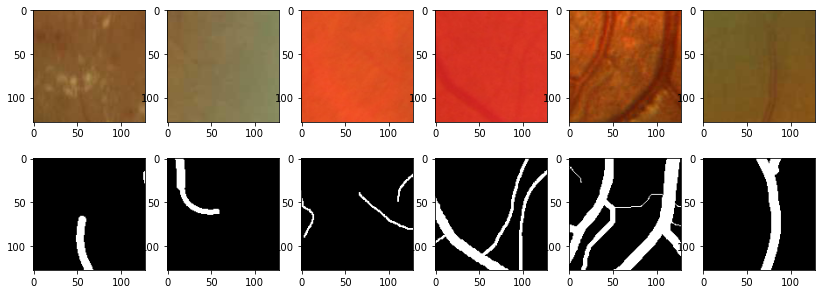

In [7]:
X,y = next(iter(test_loader))
    
# Show 6 or less images
N_imgs = X.shape[0] if X.shape[0] < 6 else 6
imgsize = N_imgs*3 if N_imgs*3 < 14 else 14

f,ax = plt.subplots(2,N_imgs,figsize=(imgsize,5))
ax = ax.flatten()
for i in range(N_imgs):
    ax[i].imshow(np.moveaxis(X[i].numpy(),0,2))
    ax[i+N_imgs].imshow(y[i,0].numpy(),'gray')
plt.show()